<a href="https://colab.research.google.com/github/NedimPojskic/Spotify-top-50-statistical-analysis/blob/main/VIS23_Z2_TIM42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Dataset: Spotify Top 50 Playlist Song**


---



# **Ovaj dio je radio Nedim Pojskić**

## Učitavanje podataka


In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import io
import scipy.stats as stats
import pandas as pd
from scipy.stats import chi2_contingency
import pandas as pd
from scipy.stats import shapiro
import pylab
from scipy.stats import kstest
import scipy.stats as st

In [ ]:
!git clone https://github.com/NedimPojskic/Spotify_podaci

Cloning into 'Spotify_podaci'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), 104.13 KiB | 2.42 MiB/s, done.


In [ ]:
#ovdje unosim data set za top 50 pjesama za svaki dan od 18.5.2023 do 10.6.2023

world = pd.read_csv('Spotify_podaci/spotify-streaming-top-50-world.csv')
display(world)

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url
0,2023-05-18,1,Ella Baila Sola,Eslabon Armado,89,165671,album,16,2023-04-28,False,https://i.scdn.co/image/ab67616d0000b273dfddf1...
1,2023-05-18,2,un x100to,Grupo Frontera & Bad Bunny,99,194563,single,1,2023-04-17,False,https://i.scdn.co/image/ab67616d0000b273716c0b...
2,2023-05-18,3,La Bebe - Remix,Yng Lvcas & Peso Pluma,99,234352,single,2,2023-03-17,True,https://i.scdn.co/image/ab67616d0000b273a04be3...
3,2023-05-18,4,Cupid - Twin Ver.,FIFTY FIFTY,97,174253,single,3,2023-02-24,False,https://i.scdn.co/image/ab67616d0000b27337c0b3...
4,2023-05-18,5,Flowers,Miley Cyrus,91,200600,album,13,2023-03-10,False,https://i.scdn.co/image/ab67616d0000b27358039b...
...,...,...,...,...,...,...,...,...,...,...,...
1195,2023-06-10,46,Another Love,Tom Odell,93,244360,album,15,2013-06-24,True,https://i.scdn.co/image/ab67616d0000b2731917a0...
1196,2023-06-10,47,Like Crazy,Jimin,93,212241,single,6,2023-03-24,False,https://i.scdn.co/image/ab67616d0000b2732b4607...
1197,2023-06-10,48,Tattoo,Loreen,93,183374,single,1,2023-02-25,False,https://i.scdn.co/image/ab67616d0000b2732b0ba8...
1198,2023-06-10,49,Say Yes To Heaven,Lana Del Rey,48,209156,single,2,2023-03-17,False,https://i.scdn.co/image/ab67616d0000b2736f4be5...


In [ ]:
# Select the numerical columns for computing summary statistics
numerical_columns = ['popularity', 'duration_ms', 'total_tracks']

# Compute the summary statistics for numerical columns
statistics = world[numerical_columns].describe().loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print(statistics)


        popularity    duration_ms  total_tracks
count  1200.000000    1200.000000   1200.000000
mean     90.066667  196437.324167      9.198333
std       8.263320   32731.952866      8.567779
min      20.000000   88304.000000      1.000000
25%      88.000000  175218.750000      1.000000
50%      92.000000  194543.000000      6.000000
75%      94.000000  219453.000000     16.000000
max     100.000000  338000.000000     36.000000


Vidimo da u setu podataka imamo 1200 pjesama.
Srednja vrijednost popularnosti je oko 90, što ima smisla jer su ovo najpopularnije pjesme na stranici, te da je standardna devijacija oko 8.

Podatak za dužinu pjesama možemo vizualizirati koristeći box-plot:

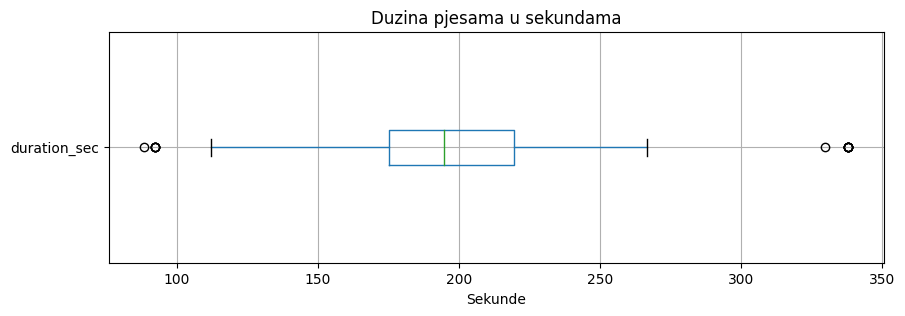

In [ ]:
# konvertujem milisekunde u sekunde
world['duration_sec'] = world['duration_ms'] / 1000

numerical_columns = ['duration_sec']

# box plot
plt.figure(figsize=(10, 3))
world[numerical_columns].boxplot(vert=False)
plt.title('Duzina pjesama u sekundama')
plt.xlabel('Sekunde')
plt.show()

# brisem dodatnu kolonu
world.drop('duration_sec', axis=1, inplace=True)

Vidimo sa box-plot-a da većina pjesama traje otprilike nešto više od 3 minute. Pri tome imamo neke pjesme koje odstupaju od toga. Na primjer, pjesme koje su duže nego inače su:

In [ ]:
# Calculate the interquartile range (IQR) for duration_ms
Q1 = world['duration_ms'].quantile(0.25)
Q3 = world['duration_ms'].quantile(0.75)
IQR = Q3 - Q1

# Find the outliers based on IQR
outliers = world[world['duration_ms'] > Q3 + 1.5 * IQR]

# Display the songs considered outliers
outliers[['song', 'artist', 'duration_ms']]

,song,artist,duration_ms
481,The Best,Tina Turner,329800
894,Los del Espacio,LIT killah,338000
937,Los del Espacio,LIT killah,338000
989,Los del Espacio,LIT killah,338000
1029,Los del Espacio,LIT killah,338000
1079,Los del Espacio,LIT killah,338000
1125,Los del Espacio,LIT killah,338000
1173,Los del Espacio,LIT killah,338000


A one koje su kraće:

In [ ]:
outliers = world[world['duration_ms'] < Q1 - 1.5 * IQR]

# Display the songs considered outliers
outliers[['song', 'artist', 'duration_ms']]

,song,artist,duration_ms
149,MATHEMATICAL DISRESPECT,Lil Mabu,88304
945,Tá OK,DENNIS & MC Kevin o Chris,92093
1049,Tá OK,DENNIS & MC Kevin o Chris,92093
1094,Tá OK,DENNIS & MC Kevin o Chris,92093
1137,Tá OK,DENNIS & MC Kevin o Chris,92093
1174,Tá OK,DENNIS & MC Kevin o Chris,92093


Zanimljivo je da se među dužim pjesmama pojavljuje skoro isključivo LIT killah, a među kraćim pjesmam skoro isključivo DENNIS & MC Kevin o Chris.

Razlog tome je to što imaju po jednu pjesmu koja je došla u top 50 ali su se obe pjesme pojavile na top 50 za više različitih dana te su zato više puta na spisku.

Ako to uzmemo u obzir, imamo samo po dvije pjesme koje su znatno duže i znatno kraće od ostalih.



---
Drugačije popularnost i dužinu pjesama možemo predstaviti i histogramom:

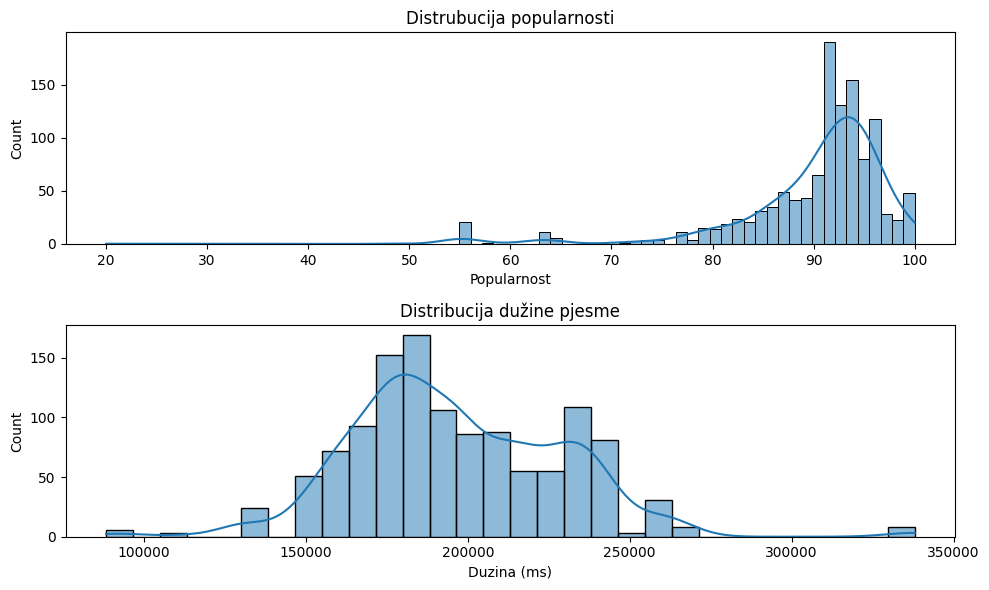

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create histograms and density plots
plt.subplot(2, 1, 1)
sns.histplot(data=world, x='popularity', kde=True)
plt.xlabel('Popularnost')
plt.title('Distrubucija popularnosti')

plt.subplot(2, 1, 2)
sns.histplot(data=world, x='duration_ms', kde=True)
plt.xlabel('Duzina (ms)')
plt.title('Distribucija dužine pjesme')

plt.tight_layout()
plt.show()

## Analiza odnosa varijabli

Prvo filtriram set tako da imam samo pjesme za prvi dan (18.5.) tako da mogu njih posebno analizirati.

In [ ]:
first_day = world[world['date'] == '2023-05-18'].copy()

Dalje, tražim korelaciju pozicije pjesme u top 50 sa njenom popularnosti.

In [ ]:
correlation = world['position'].corr(world['popularity'])

# Ispisi korelaciju
print("Korelacija izmedju pozicije i popularnosti pjesama:", correlation)

Korelacija izmedju pozicije i popularnosti pjesama: -0.2884086258519314


Vidimo da je korelacija otprilike -0.29 što znaci da je korelacija ovdje inverzna do neke mjere. Možemo ju vizualizirati koristeći scatter-plot:

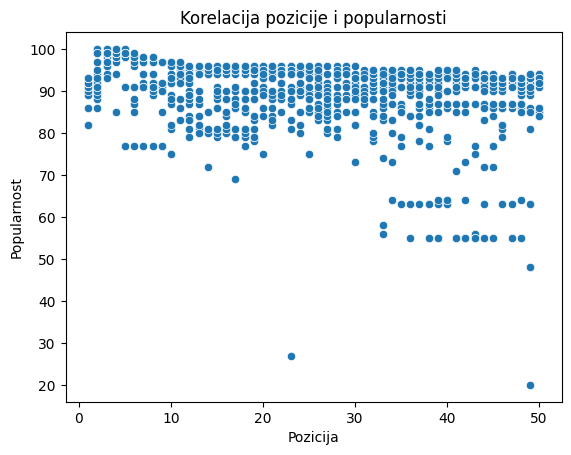

In [ ]:
# Scatter plot
sns.scatterplot(data=world, x='position', y='popularity')

# Oznake
plt.title('Korelacija pozicije i popularnosti')
plt.xlabel('Pozicija')
plt.ylabel('Popularnost')

# Ispis
plt.show()

Vidimo da, što smo bliže prvom mjestu, ima više pjesama sa manjom popularnosti što nam predstavlja inverznu korelaciju.

Zanimljivo je uočiti da popularnost pjesama opada što smo blize prvom mjestu.

Dalje, želim analizirati kako eksplicitan sadržaj i činjenica da li je pjesma izdata na albumu ili kao single utiču na popularnost pjesme i njenu poziciju u top 50.

Prvo ću grupisati pjesme u novu grupu zavisno od toga da li imaju eksplicitan sadržaj.

In [ ]:
# Grupisanje pjesama po is_explicit
explicit_analysis = world.groupby('is_explicit').agg({'popularity': 'mean', 'position': 'mean'}).reset_index()
display(explicit_analysis)


,is_explicit,popularity,position
0,False,89.841448,26.795256
1,True,90.518797,22.899749


Odavde vidimo da na popularnost gotovo da ne utiče eksplicitan sadržaj ali blago utiče na poziciju pjesme te da su pjesme bez eksplicitnog sadržaja postigle više mjesto na listi.

Dalje radim isto ali gledam da li je pjesma izdata na albumu, kao single ili kao dio kompilacije:

In [ ]:
# Grupisanje pjesama po album_type
album_type_analysis = world.groupby('album_type').agg({'popularity': 'mean', 'position': 'mean'}).reset_index()
display(album_type_analysis)


,album_type,popularity,position
0,album,88.183502,26.228956
1,compilation,27.000000,23.000000
2,single,92.019835,24.788430


Vidimo da su najmanje popularne kompilacije te da su pjesme izdate unutar kompilacija plasirale niže od drugih.


---


Pjesme izdate u sklopu albuma su u prosjeku manje popularne nego single-ovi ali uglavnom plasiraju više od njih na top 50.


---


Na kraju, iako pjesme izdate kao single-ovi imaju u prosjeku niži plasman nego pjesme u albumima, njihova popularnost je veoma visoka (92).
Pretpostavljam da to ima veze sa danas popularnim izdavanjem pjesama putem interneta zbog malog troška dok je prije interneta izdavanje pjesme na CD-u, ploči ili kaseti bilo dosta skuplje pa se nije isplatilo izdavati pojedinačne pjesme.

## Najzastupljeniji umjetnik

In [ ]:
most_common_artist = world['artist'].value_counts().idxmax()

print("Umjetnik koji se najcesce pojavljuje u cijelom setu je: ", most_common_artist)


Umjetnik koji se najcesce pojavljuje u cijelom setu je:  The Weeknd


In [ ]:
# Find the artist with the most first place songs
most_first_place_artist = world[world['position'] == 1]['artist'].value_counts().idxmax()

# Find the artist with the most last place songs
most_last_place_artist = world[world['position'] == 50]['artist'].value_counts().idxmax()

# Display the results
print("Artist with the most first place songs:", most_first_place_artist)
print("Artist with the most last place songs:", most_last_place_artist)



Artist with the most first place songs: Eslabon Armado
Artist with the most last place songs: Peso Pluma


### Zaključak 1

Dakle, možemo zakljuciti da se u cijelom setu podataka najčešće pojavljivao The Weeknd, što ima smisla budući da je on trenutno (15.06.2023) prvi po redu najslušaniji umjetnik na Spotify.

---

Dalje vidimo da je umjetnik čije su pjesme najčešće bile prvo mjesto Eslabon Armado, a umjetnik čije su pjesme najčešće bile zadnje mejsto Peso Pluma.

Osim toga, možemo doći do nekih zakljucaka o međusobnom odnosu varijabli ovog seta podataka:


*   Korelacija popularnosti i pozicije je inverzna
*   Eksplicitan sadržaj samo blago utiče na poziciju pjesme
*   Pjesme sa albuma imaju višu poziciju od single-ova ali su manje popularne





# **Ovaj dio je radio Denan Poturak**

## **Testiranje ovisnosti varijabli pomoću chi-squere testa!**


**Na početku nas interesuje da li popularnost pjesme ovisi o njenoj dužini trajanja.**

---


Postavljamo nultu hipotezu koja glasi: *Popularnost pjesme ne ovisi o dužini trajanja.*

---


Alternativna hipoteza glasi: *Popularnost pjesme ovisi o dužini trajanja.*

---



In [ ]:
popularity = world["popularity"]
duration = world["duration_ms"]

contingency_table = pd.crosstab(popularity, duration)

# Izračun chi-kvadrat testa neovisnosti
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Ispis rezultata testa
print("Chi-squared statistic:", chi2)
formatted_number = "{:.25f}".format(p_value)
print("p-value:", formatted_number)

Chi-squared statistic: 19987.153827230162
p-value: 0.0000000000000000000000000


Nakon provedbe chi-squere testa neovisnosti između dužine trajanja pjesme i njene popularnosti, dobili smo vrlo značajne rezultate. P-vrijednost je izračunata kao 0.0, što je vrlo niska vrijednost. Osim toga, chi-square statistika je izračunata kao 19987.153827230162, što ukazuje na značajne razlike između stvarnih i očekivanih frekvencija u kontingencijskoj tablici.

S obzirom na vrlo nisku p-vrijednost (p=0.0) i visoku vrijednost chi-squere statistike (19987.153827230162), možemo odlučiti odbaciti nultu hipotezu koja tvrdi da ne postoji veza između dužine trajanja pjesme i njenog stupnja popularnosti. To ukazuje da postoji statistički značajna veza između dužine trajanja pjesme i njene popularnosti.

**Sada ćemo testirati da li na popularnost utječe broj pjesama u albumu!**

---
Postavljamo nultu hipotezu koja glasi: *Na popularnost ne utječe broj pjesama u albumu.*

---

Alternativna hipoteza glasi: *Na popularnost utječe broj pjesama u albumu.*


---



In [ ]:
popularity = world["popularity"]
total = world["total_tracks"]

contingency_table = pd.crosstab(popularity, total)

# Izračun chi-kvadrat testa neovisnosti
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Ispis rezultata testa
print("Chi-squared statistic:", chi2)
formatted_number = "{:.25f}".format(p_value)
print("p-value:", formatted_number)

Chi-squared statistic: 7227.38912046553
p-value: 0.0000000000000000000000000


Na temelju vrlo niske p-vrijednosti (p=0.0) i visoke chi-squere statistike (7227.38912046553), možemo zaključiti da postoji statistički značajna veza između broja pjesama u albumu i popularnosti. Ovo upućuje na to da broj pjesama u albumu može biti važan faktor u određivanju popularnosti.

## **Provjera da li svaka varijabla prati normalnu distribuciju**

**Provjera varijable popularity**

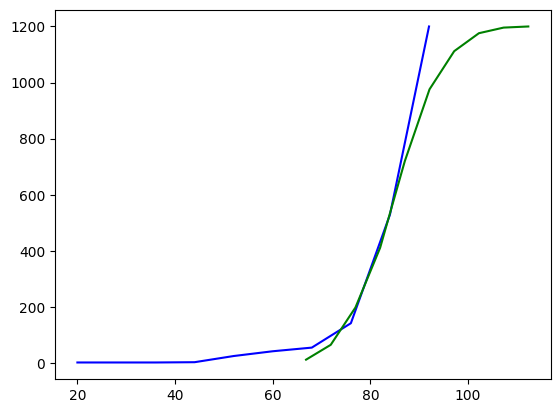

K-S statistic: 1.0
p-value: 0.0


In [ ]:
data_norm = np.random.normal(np.mean(world['popularity']), np.std(world['popularity']), len(world))
values, base = np.histogram(world['popularity'])
values_norm, base_norm = np.histogram(data_norm)
cumulative = np.cumsum(values)
cumulative_norm = np.cumsum(values_norm)
plt.plot(base[:-1], cumulative, c='blue')
plt.plot(base_norm[:-1], cumulative_norm, c='green')
plt.show()
result = (kstest(world['popularity'], cdf='norm'))
print(f"K-S statistic: {result[0]}")
print(f"p-value: {result[1]}")


In [ ]:
result = (shapiro(world['popularity']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

S-W statistic: 0.7277957797050476
p-value: 2.225346039255669e-40


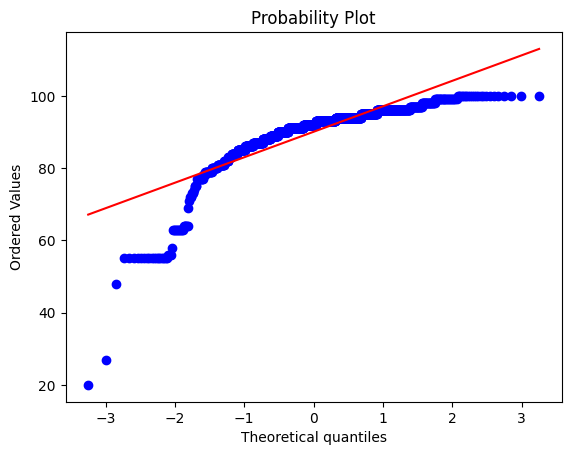

In [ ]:
stats.probplot(world['popularity'], dist="norm", plot=pylab)
pylab.show()

**Zaključak:**
Za početak na osnovu Q-Q grafika možemo vidjeti da varijabla ima velika odstupanja od normalne distribucije, te nas to upućuje da varijabla neće pratiti normalnu distribuciju. Ako postavimo nultu hipotezu da varijabla prati normalnu distribuciju, zbog p vrijednosti Shapiro-Wilk i Kolmogorov-Smirnov testa je možemo odbaciti.
*Na kraju se može zakljuciti da varijabla ne prati normalnu distribuciju.*



---



**Provjera varijable** ***duration_ms***

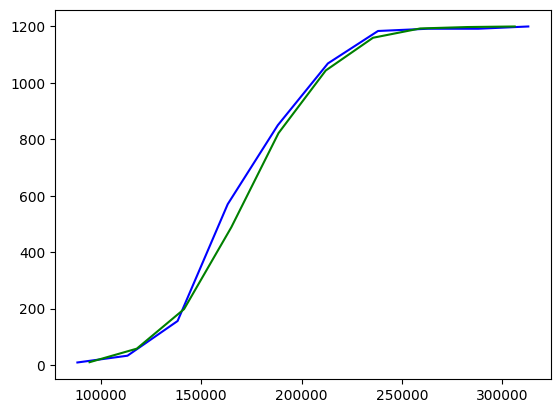

K-S statistic: 1.0
p-value: 0.0


In [ ]:
data_norm = np.random.normal(np.mean(world['duration_ms']), np.std(world['duration_ms']), len(world))
values, base = np.histogram(world['duration_ms'])
values_norm, base_norm = np.histogram(data_norm)
cumulative = np.cumsum(values)
cumulative_norm = np.cumsum(values_norm)
plt.plot(base[:-1], cumulative, c='blue')
plt.plot(base_norm[:-1], cumulative_norm, c='green')
plt.show()
result = (kstest(world['duration_ms'], cdf='norm'))
print(f"K-S statistic: {result[0]}")
print(f"p-value: {result[1]}")

In [ ]:
result = (shapiro(world['duration_ms']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

S-W statistic: 0.9689465761184692
p-value: 2.334783638668382e-15


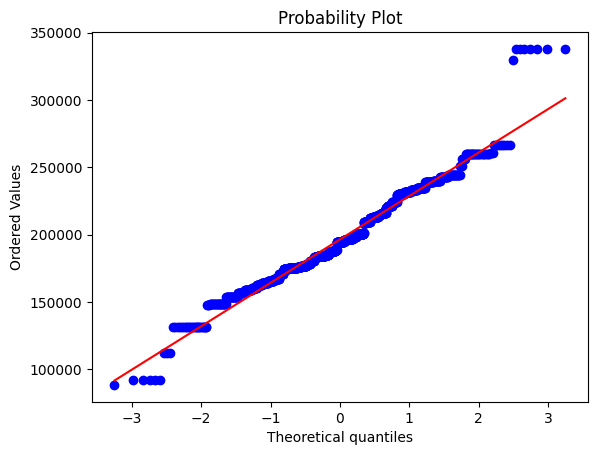

In [ ]:
stats.probplot(world['duration_ms'], dist="norm", plot=pylab)
pylab.show()

**Zaključak:**
Za početak na osnovu Q-Q grafika možemo vidjeti da varijabla ima mala odstupanja od normalne distribucije, te ćemo zaključke moći donijeti pomoću drugih testova. Ako postavimo nultu hipotezu da varijabla prati normalnu distribuciju, zbog p vrijednosti Shapiro-Wilk i Kolmogorov-Smirnov testa je možemo odbaciti.
*Na kraju se može zakljuciti da varijabla ne prati normalnu distribuciju.*



---



**Provjera varijable** ***total_tracks***

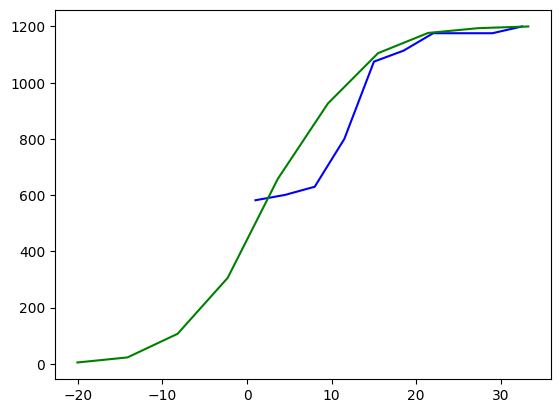

K-S statistic: 0.8413447460685429
p-value: 0.0


In [ ]:
data_norm = np.random.normal(np.mean(world['total_tracks']), np.std(world['total_tracks']), len(world))
values, base = np.histogram(world['total_tracks'])
values_norm, base_norm = np.histogram(data_norm)
cumulative = np.cumsum(values)
cumulative_norm = np.cumsum(values_norm)
plt.plot(base[:-1], cumulative, c='blue')
plt.plot(base_norm[:-1], cumulative_norm, c='green')
plt.show()
result = (kstest(world['total_tracks'], cdf='norm'))
print(f"K-S statistic: {result[0]}")
print(f"p-value: {result[1]}")

In [ ]:
result = (shapiro(world['total_tracks']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

S-W statistic: 0.8296694755554199
p-value: 6.614207328359537e-34


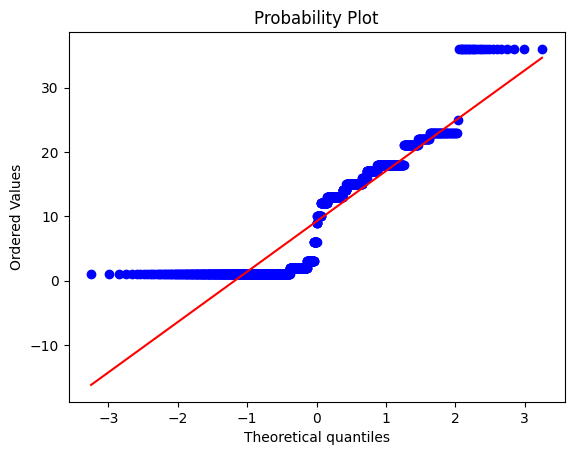

In [ ]:
stats.probplot(world['total_tracks'], dist="norm", plot=pylab)
pylab.show()

**Zaključak:**
Za početak na osnovu Q-Q grafika možemo vidjeti da varijabla ima velika odstupanja od normalne distribucije pa poprilicno dobro mozemo zakljuciti da nece pratiti normalnu distribuciju. Ako postavimo nultu hipotezu da varijabla prati normalnu distribuciju, zbog p vrijednosti Shapiro-Wilk testa je možemo odbaciti.
*Na kraju se može zakljuciti da varijabla ne prati normalnu distribuciju.*

## **Estimacija intervala povjerenja za numeričke varijable!**



---



Varijabla *popularity*

In [ ]:
st.norm.interval(confidence=0.99, loc=np.mean(world['popularity']), scale=st.sem(world['popularity']))

(89.45222447663897, 90.68110885669435)

**Zaključak:**
Možemo zaključiti da će 99% vrijednosti varijable popularity biti u opsegu
(89.45222447663897, 90.68110885669435).
Ako nam je potreban uži interval to možemo postići suzenjem intervala pouzdanosti npr na 95% i dobijaju se sljedeci rezultati.

In [ ]:
st.norm.interval(confidence=0.95, loc=np.mean(world['popularity']), scale=st.sem(world['popularity']))

(89.59913391464114, 90.53419941869218)

Interval nije nesto puno uži, ali smo postigli željeni efekat.



---



Varijabla *duration_ms*

In [ ]:
st.norm.interval(confidence=0.99, loc=np.mean(world['duration_ms']), scale=st.sem(world['duration_ms']))

(194003.4485844258, 198871.19974890753)

**Zaključak:** Možemo zaključiti da će 99% vrijednosti varijable popularity biti u opsegu (194003.4485844258, 198871.19974890753) Ako nam je potreban uži interval to možemo postići suzenjem intervala pouzdanosti npr na 95% i dobijaju se sljedeci rezultati.

In [ ]:
st.norm.interval(confidence=0.95, loc=np.mean(world['duration_ms']), scale=st.sem(world['duration_ms']))

(194585.37362108074, 198289.27471225258)

Sada se interval znatnosuzio, upoređujući sa predhodnim primjerom, te mozemo reci da će 95% vrijednosti biti u opsegu (194585.37362108074, 198289.27471225258)



---



Varijabla *total_tracks*

In [ ]:
st.norm.interval(confidence=0.99, loc=np.mean(world['total_tracks']), scale=st.sem(world['total_tracks']))

(8.561252249834155, 9.835414416832513)

**Zaključak:** Možemo zaključiti da će 99% vrijednosti varijable popularity biti u opsegu (8.561252249834155, 9.835414416832513). Ako nam je potreban uži interval to možemo postići suzenjem intervala pouzdanosti npr na 95% i dobijaju se sljedeci rezultati.

In [ ]:
st.norm.interval(confidence=0.95, loc=np.mean(world['total_tracks']), scale=st.sem(world['total_tracks']))

(8.713574511322191, 9.683092155344477)

Zaključak: Možemo zaključiti da će 95% vrijednosti varijable popularity biti u opsegu (8.713574511322191, 9.683092155344477).

# **Ovaj dio je radio Amer Mujalo**

## **Estimacija pouzdanosti proporcije**

In [ ]:
import pandas as pd
import scipy.stats as stats
!git clone https://github.com/NedimPojskic/Spotify_podaci
data = pd.read_csv("Spotify_podaci/spotify-streaming-top-50-world.csv")

filtered_data = data[data['album_type'].isin(['single', 'album'])]

single_data = filtered_data[filtered_data['album_type'] == 'single']
album_data = filtered_data[filtered_data['album_type'] == 'album']

# Izračunajte broj promatranja za svaku kategoriju
single_count = len(single_data)
album_count = len(album_data)

# Izračunajte proporciju za svaku kategoriju
single_proportion = single_count / len(filtered_data)
album_proportion = album_count / len(filtered_data)

# Postavite razinu pouzdanosti
confidence_level = 0.95

# Izračunajte interval pouzdanosti za proporciju koristeći binomnu distribuciju
single_interval = stats.norm.interval(confidence_level, loc=single_proportion, scale=stats.sem(filtered_data['album_type'] == 'single'))
album_interval = stats.norm.interval(confidence_level, loc=album_proportion, scale=stats.sem(filtered_data['album_type'] == 'album'))

print("Intervali pouzdanosti za proporcije:")
print(f"Single: {single_interval}")
print(f"Album: {album_interval}")

fatal: destination path 'Spotify_podaci' already exists and is not an empty directory.
Intervali pouzdanosti za proporcije:
Single: (0.4762750999590129, 0.5328992119675926)
Album: (0.46710078803240745, 0.5237249000409872)


* Za kategoriju "single", dobijamo interval pouzdanosti od (0.4762750999590129, 0.5328992119675926). Ovaj interval nam govori da možemo biti 95% sigurni da se stvarna proporcija vrijednosti "single" u populaciji nalazi unutar ovog intervala. Na primjer, ako bismo uzeli mnogo uzoraka iz populacije i izračunali proporciju "single" za svaki uzorak, očekujemo da će 95% tih proporcija biti unutar navedenog intervala.

* Slično, za kategoriju "album", dobijamo interval pouzdanosti od (0.46710078803240745, 0.5237249000409872). Ovaj interval nam govori da možemo biti 95% sigurni da se stvarna proporcija vrijednosti "album" u populaciji nalazi unutar ovog intervala.


## 7. Ispitivanje 4 hipoteze
---
Umjetnik The Weekend tvrdi da mu je popularnost između 85. i 90.

---
Nulta hipoteza glasi: popularnost između 85. i 90.

---


Alternativna hipoteza glasi: popularnost je manja od 85 ili veca od 90.


---



fatal: destination path 'Spotify_podaci' already exists and is not an empty directory.


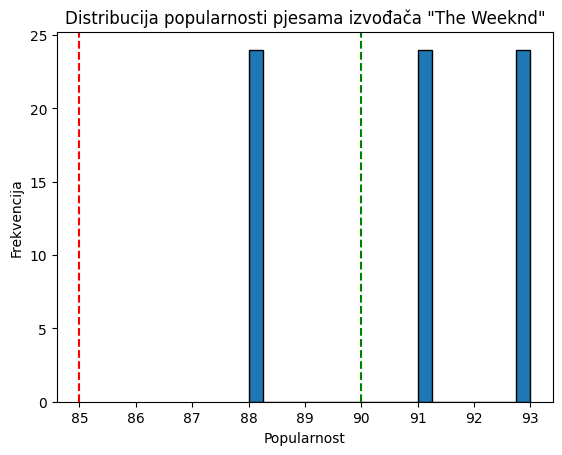

Nulta hipoteza: Srednja vrijednost od popularity je između 85 i 90
t-statistika (donja granica) : 2.733803981730662, p-vrijednost (donja granica): 1.0
t-statistika (gornja granica): 2.733803981730662, p-vrijednost (gornja granica): 0.003948954855350205
Nulta hipoteza se odbacuje.


In [ ]:
import matplotlib.pyplot as plt
!git clone https://github.com/NedimPojskic/Spotify_podaci
data = pd.read_csv('Spotify_podaci/spotify-streaming-top-50-world.csv')
# Filtriraj data samo za "The Weeknd" artist
weeknd_data = data[data['artist'] == 'The Weeknd']

#
alpha=0.05
# Nulta hipoteza: Srednja vrijednost varijable unutar je određenog raspona
lower_bound = 85
upper_bound = 90
# Izvršite t-test za donju granicu
t_stat, p_value_lower = stats.ttest_1samp(weeknd_data["popularity"], lower_bound, alternative='less')
# Izvršite t-test za gornju granicu
t_stat, p_value_upper = stats.ttest_1samp(weeknd_data["popularity"], upper_bound, alternative='greater')
# Histogram popularnosti pjesama izvođača "The Weeknd"
plt.hist(weeknd_data['popularity'], bins=20, edgecolor='black')
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Donja granica')
plt.axvline(x=upper_bound, color='green', linestyle='--', label='Gornja granica')


plt.xlabel('Popularnost')
plt.ylabel('Frekvencija')
plt.title('Distribucija popularnosti pjesama izvođača "The Weeknd"')

plt.show()
print(f"Nulta hipoteza: Srednja vrijednost od popularity je između {lower_bound} i {upper_bound}")
print(f"t-statistika (donja granica) : {t_stat}, p-vrijednost (donja granica): {p_value_lower}")
print(f"t-statistika (gornja granica): {t_stat}, p-vrijednost (gornja granica): {p_value_upper}")

if p_value_lower < alpha or p_value_upper < alpha:
   print("Nulta hipoteza se odbacuje.")
else:
   print("Nulta hipoteza se ne odbacuje.")


1. Null hipoteza: Srednja vrijednost popularnosti pjesama izvođača "The Weeknd" je između donje_granice (85) i gornje_granice (90).
2. Testiranje donje granice:

  *   T-test uspoređuje srednju vrijednost popularnosti pjesama izvođača "The Weeknd" s donjom_granicom.
  * T-statistika (t_stat) predstavlja omjer razlike između srednje vrijednosti i donje_granice u odnosu na varijabilnost u podacima.
  * P-vrijednost (p_vrijednost_donja) predstavlja vjerojatnost dobijanja t-statistike jednako ili manje ekstremne od posmatrane, pod pretpostavkom da je null hipoteza tačna.
3. Testiranje gornje granice:
  * Ponavljamo isti postupak kao u koraku 2, ali s alternativnom hipotezom "veće" (alternative='greater').
  * T-test uspoređuje srednju vrijednost popularnosti pjesama izvođača "The Weeknd" s gornje_granice.
  * T-statistika (t_stat) i p-vrijednost (p_vrijednost_gornja) se izračunavaju kao u koraku 2.

3. Ispisivanje rezultata:

  * Ispisujemo null hipotezu, t-statistiku i p-vrijednost za obje granice.
  * Ako je p-vrijednost za bilo koju granicu manja od nivoa značajnosti (alpha), odbacujemo null hipotezu.
  * Ako su obe p-vrijednosti veće ili jednake od nivoa značajnosti, ne odbacujemo null hipotezu.
4. Zaključak:
Ako je null hipoteza odbačena, to znači da postoji dovoljno dokaza da podrže alternativnu hipotezu da je srednja vrijednost popularnosti pjesama izvođača "The Weeknd" manja od donje_granice (85) ili veća od gornje_granice (90).
Ako null hipoteza nije odbačena, to znači da nemamo dovoljno dokaza da podrže alternativnu hipotezu i zaključujemo da je srednja vrijednost popularnosti pjesama izvođača "The Weeknd" između donje_granice (85) i gornje_granice (90).



Vjerojatnost da je popularnost veća od 90 veća je od 0,7

---



Nulta hipoteza glasi: vjerojatnost da je popularnost veća od 90 veća je od 0,7.

---



Alternativna hipoteza glasi: vjerojatnost da je popularnost veća od 90 manja je od 0,7

---



In [ ]:
import pandas as pd
import scipy.stats as stats
data = pd.read_csv("Spotify_podaci/spotify-streaming-top-50-world.csv")

# Testovi statističkih hipoteza


single_data = data[data['album_type'] == 'single']
# Izračunajte promatrani udio singlova s popularnošću većom od 90
observed_proportion = (single_data['popularity'] > 90).mean()
print(f"Observed Proportion: {observed_proportion}")

# Izvršiti test hipoteze
p_value = stats.binom_test(observed_proportion * len(single_data), n=len(single_data), p=0.70, alternative='greater')

print(f"p-value: {p_value}")

if p_value < 0.05:
   print("Nulta hipoteza se odbacuje. Vjerojatnost da će singlovi imati popularnost veću od 90 je značajna od 0.7")
else:
   print("Nulta hipoteza se ne odbacuje. Vjerojatnost da singlovi imaju popularnost veću od 90 nije značajna od 0.7.")


Observed Proportion: 0.7289256198347107
p-value: 0.06472378225307557
Nulta hipoteza se ne odbacuje. Vjerojatnost da singlovi imaju popularnost veću od 90 nije značajna od 0.7.


<ipython-input-33-1299a6275097>:14: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(observed_proportion * len(single_data), n=len(single_data), p=0.70, alternative='greater')


Provjeravamo je li p-vrijednost manja od 0.05 (uobičajeni nivo značajnosti). Ako je p-vrijednost manja od 0.05, odbacujemo null hipotezu i zaključujemo da postoji značajna vjerojatnost da singlovi imaju popularnost veću od 90. U suprotnom, ne odbacujemo null hipotezu i zaključujemo da nema dovoljno dokaza da singlovi imaju popularnost veću od 90.

Ova interpretacija temelji se na pretpostavci da je pretpostavljena vjerojatnost p jednaka 0.70. Ako je pretpostavljena vjerojatnost drugačija, interpretacija će se prilagoditi sukladno tome.

Null hipoteza: Srednje vrijednost trajanja je veca od 165671

---
Alternativna hipoteza: Srednje vrijednost trajanja je manja ili jednaka od 165671


---



fatal: destination path 'Spotify_podaci' already exists and is not an empty directory.


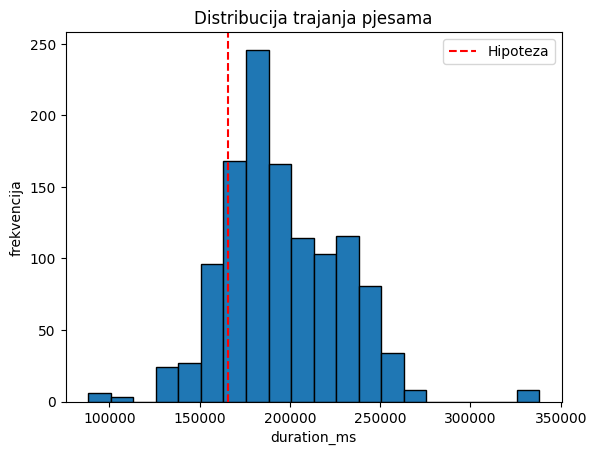

Rezultati testa hipoteze
-----------------------
Null hipoteza: Srednje vrijednost trajanja je veca od 165671
Statistika testa: 32.561
P-vrijednost: 1.000
Kritični Region: 1.646
Hipoteza : Nulta hipoteza se ne odbacuje.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

!git clone https://github.com/NedimPojskic/Spotify_podaci
dataset_path = "/content/Spotify_podaci/spotify-streaming-top-50-world.csv"
data = pd.read_csv(dataset_path)
# "Ekstrahirajte kolonu "duration_ms".
duration_ms = data['duration_ms']
alpha = 0.05
# Izvršite test hipoteze
t=165671
t_statistic, p_value = stats.ttest_1samp(duration_ms, t, alternative='less')

if p_value < alpha:
    hypothesis_result = "Nulta hipoteza se odbacuje."
else:
    hypothesis_result = "Nulta hipoteza se ne odbacuje."


plt.hist(duration_ms, bins=20, edgecolor='black')
plt.axvline(x=t, color='red', linestyle='--', label='Hipoteza')
plt.xlabel('duration_ms')
plt.ylabel('frekvencija')
plt.title('Distribucija trajanja pjesama')
plt.legend()
plt.show()
# Izračunaj kritično region
critical_region = stats.t.ppf(1 - alpha, len(duration_ms) - 1)

print("Rezultati testa hipoteze")
print("-----------------------")
print("Null hipoteza: Srednje vrijednost trajanja je veca od 165671")
print(f"Statistika testa: {t_statistic:.3f}")
print(f"P-vrijednost: {p_value:.3f}")
print(f"Kritični Region: {critical_region:.3f}")
print(f"Hipoteza : {hypothesis_result}")

Objašnjenje:


1.   Nemamo dovoljno dokaza da podrže alternativnu hipotezu da je srednja vrijednost trajanja pjesama manja od 165671.
2.   P-vrijednost je veća ili jednaka od nivoa značajnosti, što znači da je vjerojatnost dobijanja test statistike jednako ili ekstremnije od posmatrane, uz pretpostavku da je null hipoteza tačna, relativno visoka. To podržava neprihvaćanje null hipoteze.
3. Test statistika nije u kritičnom području, što podržava neprihvaćanje null hipoteze.


Null hipoteza: Singlovi imaju jednaku ili manju popularnost od albuma

---
Alternativna hipoteza: Singlovi imaju vecu popularnost od albuma


---


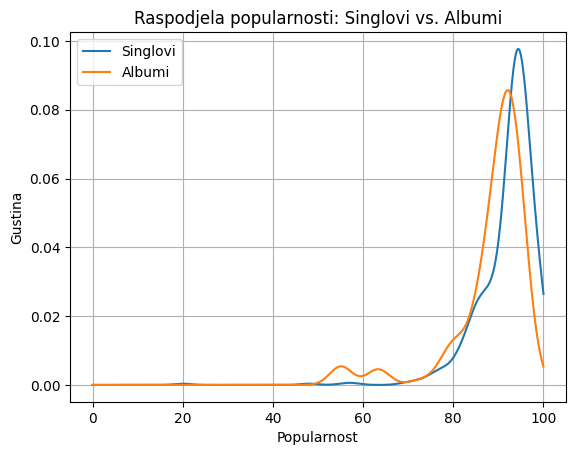

Rezultati testa hipoteze
------------------------
Null hipoteza: Singlovi imaju jednaku ili manju popularnost od albuma
Srednja vrijednost za Singlove: 92.020
Srednja vrijednost za Albume: 88.184
Standardna devijacija za Singlove: 6.668
Standardna devijacija za Albume: 8.867
Test statistika: 8.477
P-vrijednost: 0.000
Odbijena je null hipoteza.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
dataset_path = "/content/Spotify_podaci/spotify-streaming-top-50-world.csv"
data = pd.read_csv(dataset_path)

singles_data = data[data['album_type'] == 'single']
albums_data = data[data['album_type'] == 'album']

singles_popularity = singles_data['popularity']
albums_popularity = albums_data['popularity']

# Izvođenje testa hipoteze
t_statistic, p_value = stats.ttest_ind(singles_popularity, albums_popularity, alternative='greater', equal_var=True)

# Izračunavanje gustina raspodjele za singlove i albume
x = np.linspace(0, 100, num=1000)
singles_density = stats.gaussian_kde(singles_popularity)(x)
albums_density = stats.gaussian_kde(albums_popularity)(x)


plt.plot(x, singles_density, label='Singlovi')
plt.plot(x, albums_density, label='Albumi')
plt.xlabel('Popularnost')
plt.ylabel('Gustina')
plt.title('Raspodjela popularnosti: Singlovi vs. Albumi')
plt.legend()
plt.grid(True)
plt.show()


print("Rezultati testa hipoteze")
print("------------------------")
print("Null hipoteza: Singlovi imaju jednaku ili manju popularnost od albuma")
print(f"Srednja vrijednost za Singlove: {singles_popularity.mean():.3f}")
print(f"Srednja vrijednost za Albume: {albums_popularity.mean():.3f}")
print(f"Standardna devijacija za Singlove: {singles_popularity.std():.3f}")
print(f"Standardna devijacija za Albume: {albums_popularity.std():.3f}")
print(f"Test statistika: {t_statistic:.3f}")
print(f"P-vrijednost: {p_value:.3f}")

# Provjera da li se odbija null hipoteza
alfa = 0.05

if p_value < alfa:
    print("Odbijena je null hipoteza.")
else:
    print("Null hipoteza nije odbijena.")


Objašnjenje:
1. Hipoteza: Null hipoteza pretpostavlja da singlovi imaju jednaku ili manju popularnost od albuma.
2. Test statistika: Izračunata je t-statistika korištenjem dvije uzorčne t-test.
   - T-statistika mjeri razliku između srednjih vrijednosti singlova i albuma, standardizirana standardnom greškom.
   - Izračunata t-statistika je 8.477.
3. P-vrijednost: Izračunata je p-vrijednost koja je povezana s t-statistikom.
   - P-vrijednost predstavlja vjerojatnost dobijanja test statistike jednako ili ekstremnije od posmatrane, uz pretpostavku da je null hipoteza tačna.
   - Izračunata p-vrijednost je 0.000.
4. Nivo značajnosti (alfa): Postavljen je nivo značajnosti na 0.05.
   - Nivo značajnosti određuje prag za odbijanje null hipoteze.
5. Odluka: S obzirom na to da je izračunata p-vrijednost manja od nivoa značajnosti, odbijamo null hipotezu.
   - Postoji dovoljno dokaza da zaključimo da singlovi imaju veću popularnost od albuma na osnovu ovih podataka.

## Model linearne regresije

**Model linearne regresije**

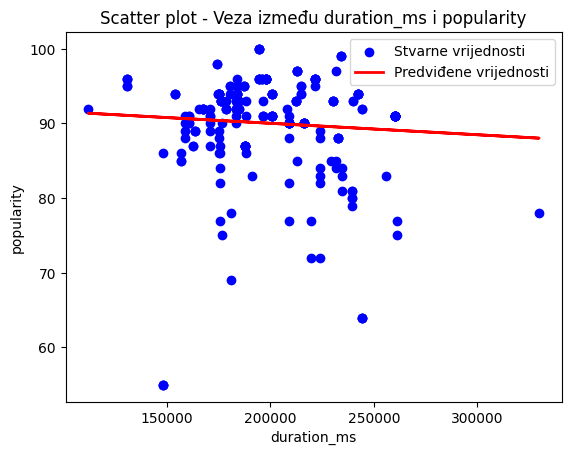

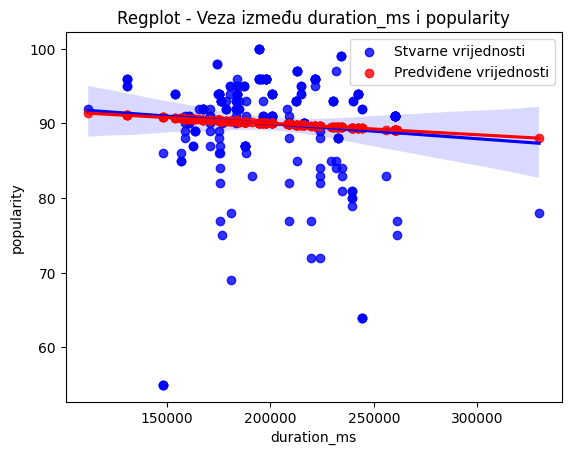

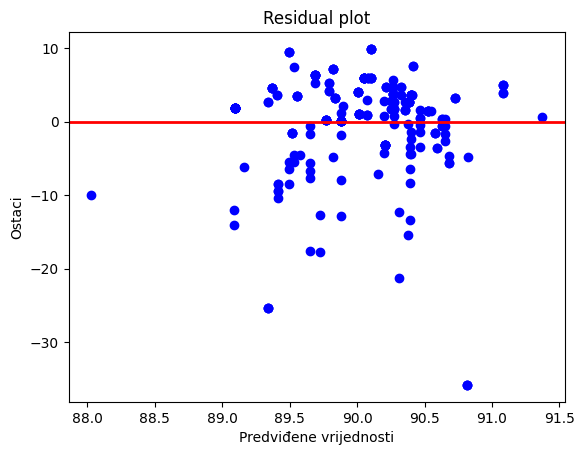

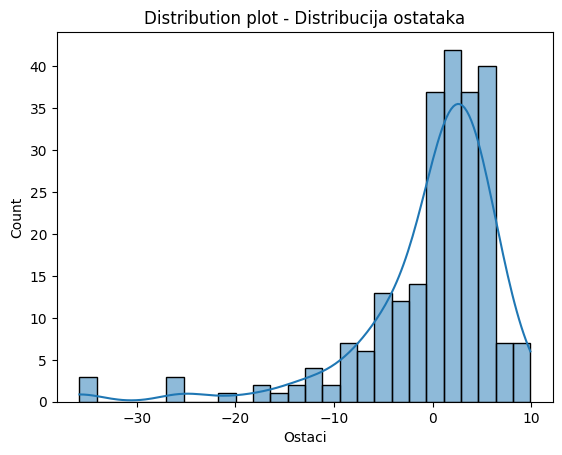

Rezultati modela linearne regresije
-----------------------
Koeficijent: -0.00
Pomak: 93.09
Srednje kvadratno odstupanje (MSE): 52.19


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = pd.read_csv("Spotify_podaci/spotify-streaming-top-50-world.csv")

# Odaberite kolone "duration_ms" kao značajke (X) i "popularity" kao ciljnu varijablu (y)
X = data[['duration_ms']]
y = data['popularity']

# Podijelite podatke na skup za treniranje i skup za testiranje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kreirajte instancu modela linearne regresije
model = LinearRegression()

# Trenirajte model na skupu za treniranje
model.fit(X_train, y_train)

# Predvidite ciljnu varijablu na skupu za testiranje
y_pred = model.predict(X_test)

# Scatter plot
plt.scatter(X_test, y_test, color='blue', label='Stvarne vrijednosti')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predviđene vrijednosti')
plt.xlabel('duration_ms')
plt.ylabel('popularity')
plt.title('Scatter plot - Veza između duration_ms i popularity')
plt.legend()
plt.show()

# Regplot
sns.regplot(x=X_test, y=y_test, color='blue', label='Stvarne vrijednosti')
sns.regplot(x=X_test, y=y_pred, color='red', label='Predviđene vrijednosti')
plt.xlabel('duration_ms')
plt.ylabel('popularity')
plt.title('Regplot - Veza između duration_ms i popularity')
plt.legend()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Ostaci')
plt.title('Residual plot')
plt.show()

# Distribution plot
sns.histplot(residuals, kde=True)
plt.xlabel('Ostaci')
plt.title('Distribution plot - Distribucija ostataka')
plt.show()


print("Rezultati modela linearne regresije")
print("-----------------------")
print(f"Koeficijent: {model.coef_[0]:.2f}")
print(f"Pomak: {model.intercept_:.2f}")
print(f"Srednje kvadratno odstupanje (MSE): {mean_squared_error(y_test, y_pred):.2f}")



* Scatter plot - prikazuje stvarne i predviđene vrijednosti na temelju trajanja pjesme
* Regplot - prikazuje regresijsku liniju koja predstavlja vezu između trajanja pjesme i popularnosti
* Residual plot - prikazuje ostake (razliku između stvarnih i predviđenih vrijednosti) u odnosu na predviđene vrijednosti
* Distribution plot - prikazuje distribuciju ostataka

Model linearne regresije je statistički model koji pokušava uspostaviti linearnu vezu između nezavisnih varijabli (u ovom slučaju "duration_ms") i ciljne varijable ("popularity"). Cilj je pronalazak najbolje linearne funkcije koja minimizira kvadratno odstupanje između stvarnih vrijednosti i predviđenih vrijednosti.

* Koeficijent: -0.00
Koeficijent predstavlja nagib linearne funkcije. U ovom slučaju, vrijednost koeficijenta je blizu nule (-0.00), što sugerira da ne postoji značajna linearna veza između "duration_ms" i "popularity". To znači da promjena u "duration_ms" ne utječe značajno na vrijednost "popularity".

* Pomak: 93.09
Pomak predstavlja vrijednost na osi y kada je vrijednost na osi x jednaka nula. U ovom slučaju, pomak iznosi 93.09. To znači da se očekuje da će popularnost biti oko 93.09 kada je trajanje pjesme ("duration_ms") jednako nula. Međutim, s obzirom na prirodu glazbenih podataka, vrijednost trajanja pjesme blizu nule može biti neuobičajena ili nemoguća.

* Srednje kvadratno odstupanje (MSE): 52.19
Srednje kvadratno odstupanje mjeri prosječnu kvadratnu razliku između stvarnih vrijednosti i predviđenih vrijednosti. U ovom slučaju, vrijednost MSE je 52.19. Što je niža vrijednost MSE, to bolje odgovara model podacima. Stoga, ova vrijednost sugeriše da model relativno dobro odgovara podacima, iako je važno imati na umu da se rezultati trebaju interpretirati u kontekstu podataka i njihove prirode.

U cjelini, dobiveni rezultati sugeriraju da ne postoji značajna linearna veza između trajanja pjesme ("duration_ms") i popularnosti ("popularity") u ovom modelu. Ovo može ukazivati na činjenicu da popularnost glazbenog djela ovisi o drugim stvarima koji nisu obuhvaćeni u ovom modelu. Također, srednje kvadratno odstupanje (MSE) od 52.19 ukazuje na neku mjeru varijabilnosti i razlike između stvarnih i predviđenih vrijednosti popularnosti.

### Zaključak 3